# 🚗 **`USED CARS PRICE PREDICTION`** 

# `Business Problem Understanding`

>**Context**

Syarah is an online marketplace for buying and selling cars in Saudi Arabia ([entrepreneur](https://www.entrepreneur.com/en-ae/finance/saudi-arabia-based-online-cars-marketplace-syarah-raises/314901)). So, we can say that there are 3 parties in the business process (Sellers - Syarah - Buyers). Sellers advertise cars they want to sell through Syarah, and buyers buy used cars advertised through Syarah. 

Sellers advertise their cars by define the specifications and price. Sometimes, it will be difficult for the seller who don't know about price range in the market. Because it could be that the seller sets a price that is too low (underpriced) or too high (overpriced) than the price should be. If underpriced, then Sellers will get inappropriate profit. Meanwhile, if overpriced, it may lead to the cars is hard to sold.

>**Problem Statement**

Based on context, as a Business owner, Syarah, also will affected by those problem. If overpriced, buyers will decrease, so the company profit also decrease. As time goes by, sellers will don't want to advertise their cars thorugh Syarah due to low buyers/visitor. If underpriced, company will only get small profit (proportion of sales) due to small price. So we can conclude that the problems is: **How's Syarah can help sellers to determine the right price?**

>**Goals**

With the problem above, we can determine our goals (solution) as: **Provides car price prediction by minimizing errors so that it is not overpriced and underpriced**

>**Project Stakeholder**

Stakeholder who will use the solution is **Sellers in Syarah**

>**Analytics Approach**

We will use **Regression Model** as method to achieve the goal. 

Regression is a type of Machine learning which helps in finding the relationship between independent and dependent variable. In simple words, Regression can be defined as a Machine learning problem where we have to predict discrete values like price, Rating, Fees, etc ([Raghav Agrawal](https://www.analyticsvidhya.com/blog/2021/05/know-the-best-evaluation-metrics-for-your-regression-model/)).

>**Metrics Evaluation**

Evaluation metrics are quantitative measures used to assess the performance and effectiveness of a statistical or machine learning model. These metrics provide insights into how well the model is performing and help in comparing different models or algorithms ([Tavish Srivastava](https://www.analyticsvidhya.com/blog/2019/08/11-important-model-evaluation-error-metrics/#:~:text=Evaluation%20metrics%20are%20quantitative%20measures,comparing%20different%20models%20or%20algorithms.)).

Regression machine learning models have various metrics such as MAE, MAPE, and R-squared.
* **Mean Absolute Error(MAE)** is a very simple metric which calculates the absolute difference between actual and predicted values ([Raghav Agrawal](https://www.analyticsvidhya.com/blog/2021/05/know-the-best-evaluation-metrics-for-your-regression-model/)).
* **Mean Absolute Percentage Error (MAPE)** measures the precision of the forecasts by showing the average percent difference between forecasts and actual activities regardless of whether the individual forecasts were too high or too low. A MAPE less than 5% is considered as an indication that the forecast is acceptably accurate. A MAPE greater than 10% but less than 25% indicates low, but acceptable accuracy and MAPE greater than 25% very low accuracy, so low that the forecast is not acceptable in terms of its accuracy ([Swanson, David A](https://escholarship.org/content/qt1f71t3x9/qt1f71t3x9.pdf?t=o5wul1#:~:text=A%20MAPE%20less%20than%205,in%20terms%20of%20its%20accuracy.)).
* **R squared (R²)** is a popular metric for identifying model accuracy. It tells how close are the data points to the fitted line generated by a regression algorithm. A larger R squared value indicates a better fit. This helps us to find the relationship between the independent variable towards the dependent variable. R² score ranges from 0 to 1. The closest to 1 the R², the better the regression model is. If R² is equal to 0, the model is not performing better than a random model ([Shweta Goyal](https://medium.com/analytics-vidhya/evaluation-metrics-for-regression-models-c91c65d73af#:~:text=R%20squared%20is%20a%20popular,variable%20towards%20the%20dependent%20variable.)).

# `Data Understanding`

The dataset contains 5624 records of used cars collected from syarah.com. Each row represents a used car. Other information regarding each car is the brand name, model, manufacturing year, origin, options, engine capacity, transmission type, mileage that the car covered, region price, and negotiable.

Features
-	**Type**: Type of used car.
-	**Region**: The region in which the used car was offered for sale.
-	**Make**: The company name.
-	**Gear_Type**: Gear type size of used car.
-	**Origin**: Origin of used car.
-	**Options**: Options of used car.
-	**Year**: Manufacturing year.
-	**Engine_Size**: The engine size of used car.
-	**Mileage**: Mileage of used car	
-	**Negotiable**: True if the price is 0, that means it is negotiable.
-	**Price**: Used car price.

In [51]:
# data wrangling
import numpy as np
import pandas as pd

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn_qqplot import pplot

# additional lib
import function as fn

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_colwidth', 2000)

In [52]:
# load data
df = pd.read_csv(r'D:\PURWADHIKA\PLAYGROUND\PYTHON\Modul 3\Capstone\Saudi Arabia Used Cars\data\raw\data_saudi_used_cars.csv')
df.head()

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
0,Corolla,Abha,Toyota,Manual,Saudi,Standard,2013,1.4,421000,True,0
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,False,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,False,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False,42000
4,FJ,Riyadh,Toyota,Automatic,Saudi,Full,2020,4.0,49000,True,0


In [53]:
# check shape
df.shape

(5624, 11)

## Initial Assesment

In [54]:
# check initial info of data
pd.DataFrame({
    'column': df.columns.values,
    'type': df.dtypes.values,
    'n_unique': df.nunique().values,
    'min': df.min().values,
    'max': df.max().values,
    'sample_unique': [df[col].sort_values().unique() for col in df.columns]
})

,column,type,n_unique,min,max,sample_unique
0,Type,object,347,2,ِACTIS V80,"[2, 3, 300, 3008, 301, 360, 4Runner, 5, 500, 5008, 6, 911, A, A3, A4, A5, A6, A7, A8, APV, ASX, ATS, Abeka, Acadia, Accent, Accord, Altima, Armada, Attrage, Aurion, Avalanche, Avalon, Avante, Avanza, Aveo, Azera, Azkarra, B50, BT-50, Beetle, Bentayga, Blazer, Bora, Boxer, Bronco, Bus County, Bus Urvan, C, C200, C300, C5700, CC, CL, CLA, CLS, CRV, CS35, CS35 Plus, CS75, CS85, CS95, CT-S, CT4, CT5, CT6, CX3, CX5, CX7, CX9, Cadenza, Cadillac, Camargue, Camaro, Camry, Caprice, Capture, Carens, Carenz, Carnival, Cayenne, Cayenne S, Cayenne Turbo, Cayenne Turbo S, Cayman, Centennial, Cerato, Challenger, Charger, Cherokee, Ciocca, City, Civic, Coaster, Colorado, Compass, Coolray, Copper, Cores, Corolla, Corolla Cross, ...]"
1,Region,object,27,Abha,Yanbu,"[Abha, Al-Ahsa, Al-Baha, Al-Jouf, Al-Medina, Al-Namas, Arar, Aseer, Besha, Dammam, Hafar Al-Batin, Hail, Jazan, Jeddah, Jubail, Khobar, Makkah, Najran, Qassim, Qurayyat, Riyadh, Sabya, Sakaka, Tabouk, Taef, Wadi Dawasir, Yanbu]"
2,Make,object,58,Aston Martin,Škoda,"[Aston Martin, Audi, BMW, BYD, Bentley, Cadillac, Changan, Chery, Chevrolet, Chrysler, Classic, Daihatsu, Dodge, FAW, Ferrari, Fiat, Ford, Foton, GAC, GMC, Geely, Genesis, Great Wall, HAVAL, Honda, Hummer, Hyundai, INFINITI, Isuzu, Iveco, Jaguar, Jeep, Kia, Land Rover, Lexus, Lifan, Lincoln, MG, MINI, Maserati, Mazda, Mercedes, Mercury, Mitsubishi, Nissan, Other, Peugeot, Porsche, Renault, Rolls-Royce, SsangYong, Suzuki, Tata, Toyota, Victory Auto, Volkswagen, Zhengzhou, Škoda]"
3,Gear_Type,object,2,Automatic,Manual,"[Automatic, Manual]"
4,Origin,object,4,Gulf Arabic,Unknown,"[Gulf Arabic, Other, Saudi, Unknown]"
5,Options,object,3,Full,Standard,"[Full, Semi Full, Standard]"
6,Year,int64,50,1963,2022,"[1963, 1964, 1965, 1975, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]"
7,Engine_Size,float64,71,1.0,9.0,"[1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0, 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6.0, 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7.0, 7.2, 7.4, 7.5, 7.8, 8.0, 8.5, 8.7, 8.8, 8.9, 9.0]"
8,Mileage,int64,1716,100,20000000,"[100, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 118, 119, 120, 121, 122, 124, 126, 128, 130, 131, 132, 133, 135, 138, 140, 142, 143, 145, 147, 148, 149, 150, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 169, 170, 172, 173, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 204, 205, 206, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 219, 220, 222, 223, 224, 225, ...]"
9,Negotiable,bool,2,False,True,"[False, True]"


**Insight :** 
* This dataset contains 5624 rows and 11 columns
* Variable Numerical: Year, Engine_Size, Mileage, Price
* Variable Categorical: Type, Region, Make, Gear_Type, Origin, Options, Negotiable
* The model year of cars sold are from 1963 to 2022
* Highest price is 850000 Riyals
* Ambigous Values:
    * `Mileage` : contain extreme value 20000000, which is unlikely
    * `Price` : contains values 0 and 1, which is unlikely 

# `Data Preparation`

## Finding Problematic Data

### **Duplicate Data**

In [55]:
# check duplicated data
dup = df.duplicated().sum()
dup, dup/df.shape[0]*100

(4, 0.07112375533428165)

* **Insight** : This dataset contains 4 (0.07%) duplicate data
* **Handling** : delete the data

In [56]:
# delete duplicate data
df.drop_duplicates(inplace=True)

### **Missing Values**

In [57]:
# check missing values
df.isnull().sum()

Type           0
Region         0
Make           0
Gear_Type      0
Origin         0
Options        0
Year           0
Engine_Size    0
Mileage        0
Negotiable     0
Price          0
dtype: int64

* **Insight** : This dataset doesn't have missing values

### **Ambigous Values**

From initial assessment we know that there are ambigous values in `Mileage` and `Price`. In this part, we only check and handling `Price` column. `Mileage` column will handle later in outliers.

In [58]:
# check price 0
sum(df.Price == 0), sum(df.Price == 0)/df.shape[0]

(1796, 0.3195729537366548)

<Axes: >

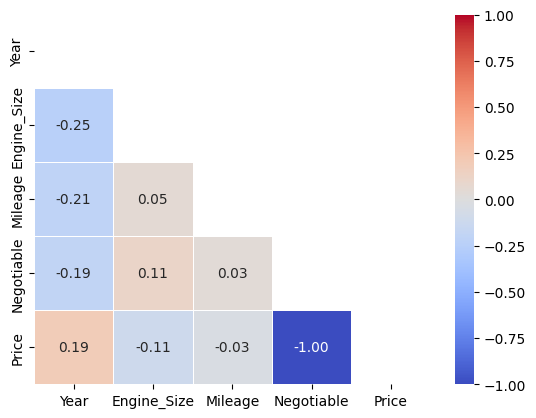

In [59]:
# check correlation with another columns
dfAmb = df.copy()

# change non 0 val price to 1
dfAmb['Price'][dfAmb.Price != 0] = 1

# numerical
numCol = dfAmb.select_dtypes(exclude=object).columns
numCor = dfAmb[numCol].corr()

# correlation with numerical variables
sns.heatmap(numCor, annot=True, mask=np.triu(numCor), vmin=-1, vmax=1, cmap="coolwarm", fmt=".2f", linewidths=.5)

* **Insight** :
    * Number of 0 values are 1796 rows (31.95%)
    * `Price` have strong negative correlation with `Negotiable`. It means that 0 price appear when the car is negotiable.
* **Handling** :
    * Remove the data, and use it as unseen data
    * Remove the `Negotiable` column, because it will only contains 1 unique values, which is not useful for modeling

In [60]:
# delete negotiable column
df.drop(columns='Negotiable', inplace=True)
df.shape

(5620, 10)

In [61]:
# divide price 0 and save as unseen data
df[df.Price == 0].to_csv(r'D:\PURWADHIKA\PLAYGROUND\PYTHON\Modul 3\Capstone\Saudi Arabia Used Cars\data\processed\unseen_data.csv', index=False)

In [62]:
# remove 0 price values
df = df[df.Price != 0]
df.shape

(3824, 10)

In [63]:
# check another ambigous values in price
df.nsmallest(5, columns='Price')

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
3131,Yukon,Jubail,GMC,Automatic,Saudi,Full,2019,5.3,50000,1
3992,G80,Riyadh,Genesis,Automatic,Other,Semi Full,2018,3.8,170000,500
4399,Yaris,Riyadh,Toyota,Automatic,Saudi,Standard,2018,1.5,100000,850
5128,Rio,Arar,Kia,Automatic,Saudi,Standard,2019,1.4,55500,884
3474,Yaris,Najran,Toyota,Automatic,Saudi,Standard,2019,1.6,85000,950


* **Insight** :
    * From 5 smallest price, we know that `Price` still have ambigous values, such as 1, 500, and other small `Price`
* **Handling** :
    * Based on domain knowledge, we know that minimum salary in Saudi Arabia is 4683 SAR ([paylab](https://saudiarabia.paylab.com/en/salaryinfo#:~:text=The%20salary%20range%20for%20people,actual%20maximum%20salary%20is%20higher))
    * It's unlikely that car have `Price` under the minimum salary (too cheap)
    * So, we will **remove car that have price under the minimum salary** 

In [64]:
# remove price 1
df = df[df.Price > 4683]
df.shape

(3756, 10)

### **Outliers**

#### Mileage

In [65]:
# function to analyze outliers
def ansOut(data, col):
    # Cut the window in 2 parts
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize=(15,5))

    # add graph
    sns.boxplot(data=data, x=col, ax=ax_box)
    sns.histplot(data[col], kde=True, ax=ax_hist)

    # Remove x axis name for the boxplot
    ax_box.set(xlabel='')

    # summary
    result = fn.checkOutlier(data, col)
    print('Numbers of outliers: {} ({:.2f}%)'.format(result[0],result[1]))
    display(data[col].describe().apply("{0:.0f}".format))

Numbers of outliers: 129 (3.43%)


count        3756
mean       143882
std        381530
min           100
25%         49000
50%        104080
75%        184000
max      20000000
Name: Mileage, dtype: object

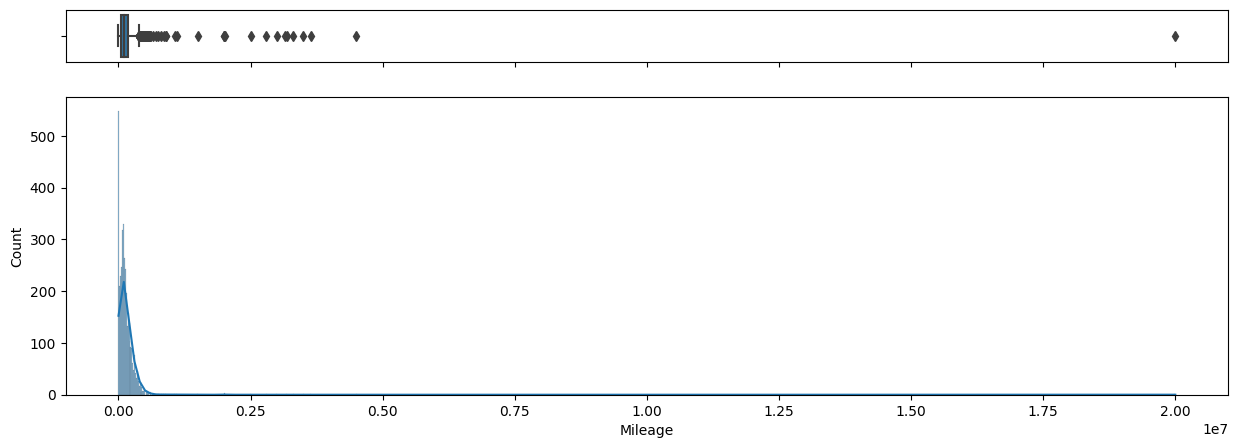

In [66]:
# analyze Mileage outliers 
ansOut(df, 'Mileage')

* **Insight** :
    * There are 131 (3.43% outliers of the data)
* **Handling** :
    * Domain knowledge: The annual miles per year is assumed to be 16,000, the average reported mileage for used cars taken from ksa.motory.com ([Tamara L. Sheldon](https://www.sciencedirect.com/science/article/pii/S0140988320303662#:~:text=The%20annual%20miles%20per%20year,from%20ksa.motory.com.))
    * From the dataset we know that Year range is from 1963 onwards. 
    * It's highly unlikely for cars have have mileage more than than 60 years (current year 2023 from 1963). 
    * So, **cars with mileage more than 960000 (60*16000) will be removed**.

In [67]:
# set average total mileage
atm = 960000

# remove cars above atm
df = df[df['Mileage'] < atm].reset_index(drop=True)
df.shape

(3740, 10)

Numbers of outliers: 113 (3.02%)


count      3740
mean     128656
std      110962
min         100
25%       49000
50%      104000
75%      183000
max      900000
Name: Mileage, dtype: object

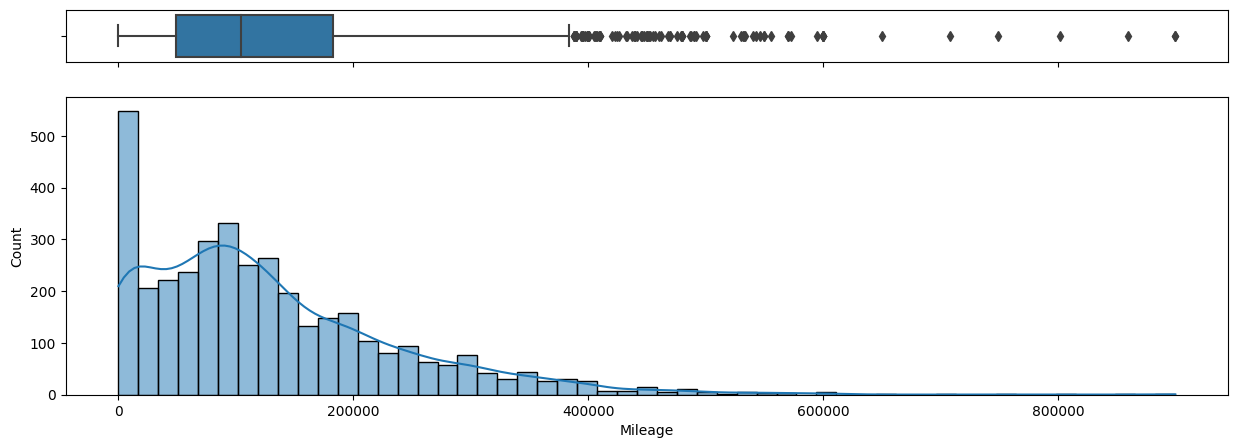

In [68]:
# check Distribution of MIleage again
ansOut(df, 'Mileage')

## Clean Data

In [69]:
# divide price 0 and save as unseen data
df.to_csv(r'D:\PURWADHIKA\PLAYGROUND\PYTHON\Modul 3\Capstone\Saudi Arabia Used Cars\data\processed\clean_data.csv', index=False)

In [70]:
# check shape
df.shape

(3740, 10)

In [71]:
# check initial info of data
pd.DataFrame({
    'column': df.columns.values,
    'type': df.dtypes.values,
    'n_unique': df.nunique().values,
    'min': df.min().values,
    'max': df.max().values,
    'sample_unique': [df[col].sort_values().unique() for col in df.columns]
})

,column,type,n_unique,min,max,sample_unique
0,Type,object,317,2,i40,"[2, 3, 300, 3008, 301, 360, 4Runner, 5, 500, 5008, 6, 911, A, A3, A4, A5, A6, A7, A8, APV, ASX, ATS, Abeka, Acadia, Accent, Accord, Altima, Armada, Attrage, Aurion, Avalon, Avante, Avanza, Aveo, Azera, Azkarra, B50, Beetle, Bentayga, Blazer, Bus County, Bus Urvan, C, C200, C300, CC, CL, CLA, CLS, CRV, CS35, CS35 Plus, CS75, CS85, CS95, CT-S, CT4, CT5, CT6, CX3, CX5, CX7, CX9, Cadenza, Cadillac, Camargue, Camaro, Camry, Caprice, Carens, Carenz, Carnival, Cayenne, Cayenne S, Cayenne Turbo, Cayman, Cerato, Challenger, Charger, Cherokee, Ciocca, City, Civic, Coaster, Colorado, Compass, Coolray, Copper, Cores, Corolla, Countryman, Coupe, Coupe S, Cressida, Creta, Cruze, D'max, D-MAX, DB9, Daily, ...]"
1,Region,object,27,Abha,Yanbu,"[Abha, Al-Ahsa, Al-Baha, Al-Jouf, Al-Medina, Al-Namas, Arar, Aseer, Besha, Dammam, Hafar Al-Batin, Hail, Jazan, Jeddah, Jubail, Khobar, Makkah, Najran, Qassim, Qurayyat, Riyadh, Sabya, Sakaka, Tabouk, Taef, Wadi Dawasir, Yanbu]"
2,Make,object,56,Aston Martin,Škoda,"[Aston Martin, Audi, BMW, BYD, Bentley, Cadillac, Changan, Chery, Chevrolet, Chrysler, Classic, Daihatsu, Dodge, FAW, Ferrari, Fiat, Ford, Foton, GAC, GMC, Geely, Genesis, Great Wall, HAVAL, Honda, Hummer, Hyundai, INFINITI, Isuzu, Iveco, Jaguar, Jeep, Kia, Land Rover, Lexus, Lifan, Lincoln, MG, MINI, Maserati, Mazda, Mercedes, Mercury, Mitsubishi, Nissan, Other, Peugeot, Porsche, Renault, Rolls-Royce, Suzuki, Toyota, Victory Auto, Volkswagen, Zhengzhou, Škoda]"
3,Gear_Type,object,2,Automatic,Manual,"[Automatic, Manual]"
4,Origin,object,4,Gulf Arabic,Unknown,"[Gulf Arabic, Other, Saudi, Unknown]"
5,Options,object,3,Full,Standard,"[Full, Semi Full, Standard]"
6,Year,int64,41,1963,2021,"[1963, 1964, 1978, 1980, 1983, 1985, 1986, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]"
7,Engine_Size,float64,65,1.0,9.0,"[1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 6.0, 6.1, 6.2, 6.3, 6.4, 6.6, 6.7, 6.8, 6.9, 7.0, 7.2, 7.5, 8.0, 8.5, 8.7, 8.8, 9.0]"
8,Mileage,int64,1313,100,900000,"[100, 105, 107, 108, 109, 110, 111, 113, 114, 115, 116, 119, 120, 121, 122, 124, 128, 130, 131, 138, 140, 142, 145, 147, 148, 150, 154, 155, 157, 159, 160, 161, 166, 167, 169, 170, 172, 173, 175, 177, 178, 179, 180, 181, 185, 186, 187, 189, 190, 191, 194, 195, 196, 197, 198, 200, 201, 205, 206, 208, 210, 212, 215, 216, 219, 220, 223, 225, 226, 228, 230, 232, 233, 235, 238, 239, 240, 243, 244, 246, 247, 248, 249, 250, 251, 253, 255, 256, 260, 262, 263, 270, 272, 276, 277, 278, 280, 281, 285, 286, ...]"
9,Price,int64,403,5000,850000,"[5000, 5500, 6000, 6500, 7000, 7500, 8000, 9000, 9500, 10000, 11000, 11500, 12000, 12500, 13000, 13500, 14000, 14250, 14500, 15000, 16000, 16500, 17000, 17500, 18000, 18500, 19000, 19500, 20000, 21000, 21500, 22000, 22500, 23000, 23500, 23900, 24000, 24500, 25000, 25500, 26000, 26500, 26800, 27000, 27499, 27500, 28000, 28500, 29000, 29500, 29750, 30000, 31000, 32000, 32500, 33000, 33500, 34000, 34500, 34800, 35000, 35500, 36000, 36500, 37000, 37500, 38000, 38500, 39000, 39500, 40000, 40500, 40800, 41000, 41500, 42000, 42500, 43000, 43500, 44000, 44500, 45000, 45500, 46000, 46500, 47000, 47500, 48000, 48500, 49000, 49500, 50000, 50500, 51000, 51500, 52000, 53000, 53500, 54000, 54500, ...]"


**Insight :** 
* The clean dataset contains 3807 rows and 10 columns
* Numerical variable: Year, Engine_Size, Mileage, Price
* Categorical variable: Type, Region, Make, Gear_Type, Origin, Options
* There are no extreme/ambigous values in all variable

In [72]:
df.Price.describe()

count      3740.000000
mean      79613.078342
std       72728.051902
min        5000.000000
25%       36500.000000
50%       59000.000000
75%       95000.000000
max      850000.000000
Name: Price, dtype: float64

# `Modeling`

In [73]:
# Model Algorithm (modeling)
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn import linear_model
import statsmodels.api as sm

# Data Preparation
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, StratifiedKFold, KFold
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
import category_encoders as ce
from sklearn.compose import TransformedTargetRegressor

# Evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, mean_squared_log_error, r2_score

# pycaret
import statistics

### **Splitting**

Before doing modeling, we need to split the data into training and test dataset

In [74]:
# divide feature and target

target = 'Price'
feature = df.drop(columns=target).columns

display(target, feature)

'Price'

Index(['Type', 'Region', 'Make', 'Gear_Type', 'Origin', 'Options', 'Year',
       'Engine_Size', 'Mileage'],
      dtype='object')

`Price` is a label, and rest ('Type', 'Region', 'Make', 'Gear_Type', 'Origin', 'Options', 'Year', 'Engine_Size', 'Mileage') are a features to predict the `Price`.

In [75]:
# data spliting

train, test = train_test_split(
    df,
    test_size = 0.20,
    random_state = 7
)

print(train.shape, test.shape)

(2992, 10) (748, 10)


- We split the data with a ratio train test = 80:20
- Training dataset contain 2992 rows (80%)
- Test dataset contain 748 rows (20%)

### **Encoding**

In [76]:
cat = df.select_dtypes(object).columns

# check initial info of data
pd.DataFrame({
    'column': df[cat].columns.values,
    'type': df[cat].dtypes.values,
    'n_unique': df[cat].nunique().values,
    'min': df[cat].min().values,
    'max': df[cat].max().values,
    'sample_unique': [df[col].sort_values().unique() for col in df[cat].columns]
})

,column,type,n_unique,min,max,sample_unique
0,Type,object,317,2,i40,"[2, 3, 300, 3008, 301, 360, 4Runner, 5, 500, 5008, 6, 911, A, A3, A4, A5, A6, A7, A8, APV, ASX, ATS, Abeka, Acadia, Accent, Accord, Altima, Armada, Attrage, Aurion, Avalon, Avante, Avanza, Aveo, Azera, Azkarra, B50, Beetle, Bentayga, Blazer, Bus County, Bus Urvan, C, C200, C300, CC, CL, CLA, CLS, CRV, CS35, CS35 Plus, CS75, CS85, CS95, CT-S, CT4, CT5, CT6, CX3, CX5, CX7, CX9, Cadenza, Cadillac, Camargue, Camaro, Camry, Caprice, Carens, Carenz, Carnival, Cayenne, Cayenne S, Cayenne Turbo, Cayman, Cerato, Challenger, Charger, Cherokee, Ciocca, City, Civic, Coaster, Colorado, Compass, Coolray, Copper, Cores, Corolla, Countryman, Coupe, Coupe S, Cressida, Creta, Cruze, D'max, D-MAX, DB9, Daily, ...]"
1,Region,object,27,Abha,Yanbu,"[Abha, Al-Ahsa, Al-Baha, Al-Jouf, Al-Medina, Al-Namas, Arar, Aseer, Besha, Dammam, Hafar Al-Batin, Hail, Jazan, Jeddah, Jubail, Khobar, Makkah, Najran, Qassim, Qurayyat, Riyadh, Sabya, Sakaka, Tabouk, Taef, Wadi Dawasir, Yanbu]"
2,Make,object,56,Aston Martin,Škoda,"[Aston Martin, Audi, BMW, BYD, Bentley, Cadillac, Changan, Chery, Chevrolet, Chrysler, Classic, Daihatsu, Dodge, FAW, Ferrari, Fiat, Ford, Foton, GAC, GMC, Geely, Genesis, Great Wall, HAVAL, Honda, Hummer, Hyundai, INFINITI, Isuzu, Iveco, Jaguar, Jeep, Kia, Land Rover, Lexus, Lifan, Lincoln, MG, MINI, Maserati, Mazda, Mercedes, Mercury, Mitsubishi, Nissan, Other, Peugeot, Porsche, Renault, Rolls-Royce, Suzuki, Toyota, Victory Auto, Volkswagen, Zhengzhou, Škoda]"
3,Gear_Type,object,2,Automatic,Manual,"[Automatic, Manual]"
4,Origin,object,4,Gulf Arabic,Unknown,"[Gulf Arabic, Other, Saudi, Unknown]"
5,Options,object,3,Full,Standard,"[Full, Semi Full, Standard]"


In [77]:
# Create encoder
ct = ColumnTransformer([
    ('One Hot Encoder', OneHotEncoder(drop='first'), ['Gear_Type', 'Origin']),
    ('Ordinal Encoder', ce.OrdinalEncoder(cols=['Options'], mapping=[{'col': 'Options', 'mapping': {'Standard': 0, 'Semi Full': 1, 'Full': 2}}]), ['Options']),
    ('Target Encoder', ce.TargetEncoder(), ['Type', 'Region', 'Make'])
], remainder='passthrough')

### **Benchmark Model**

In [78]:
# Create Model

# Model without transformed target
# Stand Alone Model
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=7)
# Ensemble Model
rf = RandomForestRegressor(random_state=7)
xgb = XGBRegressor(random_state=7)
ada = AdaBoostRegressor(random_state=7)


# Model with transformed target
# Stand Alone Model
log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
# Ensemble Model
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)
log_ada = TransformedTargetRegressor(ada, func=np.log, inverse_func=np.exp)

# Collect Models
models = {
    'LinearRegression': lr,
    'KNeighborsRegressor': knn,
    'DecisionTreeRegressor': dt,
    'RandomForestRegressor': rf,
    'XGBRegressor': xgb,
    'AdaBoostRegressor': ada,
    'LinearRegression-logTarget': log_lr,
    'KNeighborsRegressor-logTarget': log_knn,
    'DecisionTreeRegressor-logTarget': log_dt,
    'RandomForestRegressor-logTarget': log_rf,
    'XGBRegressor-logTarget': log_xgb,
    'AdaBoostRegressor-logTarget': log_ada,
    }

result = []

for name, est in models.items():
    
    crossval = KFold(n_splits=5, shuffle=True, random_state=7)

    estimator = Pipeline([
        ('preproces', ct),
        ('model', est)
    ])

    # MAE
    mae = cross_val_score(
        estimator, 
        train[feature], 
        train[target], 
        cv=crossval, 
        scoring='neg_mean_absolute_error'
        )

    # MAPE
    mape = cross_val_score(
        estimator, 
        train[feature], 
        train[target], 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error'
        )

    # R2
    r2  =  cross_val_score(
        estimator, 
        train[feature], 
        train[target], 
        cv = crossval, 
        scoring = 'r2'
        )
    
    # Adjusted R2
    res = []
    for val in r2:
        res.append(fn.adj_r2(val, len(train), len(feature)))

    # Collect Result
    result.append(
        {
            'Model': name,
            'MAE': abs(mae.mean()),
            'MAPE': abs(mape.mean()),
            'r2':r2.mean(),
            'Adj-r2':np.array(res).mean(),
            'std-MAE': statistics.stdev(mae),
            'std-MAPE': statistics.stdev(mape),
        }
    )

resultDf = pd.DataFrame(result).set_index('Model')

In [79]:
resultDf.sort_values(by='MAE')\
    .style\
    .highlight_max(subset=['r2','Adj-r2'], color = 'yellow', axis = 0)\
    .highlight_min(subset=['MAE','MAPE'], color = 'yellow', axis = 0)

,MAE,MAPE,r2,Adj-r2,std-MAE,std-MAPE
Model,,,,,,
XGBRegressor-logTarget,13464.727007,0.187674,0.826984,0.826461,801.270450,0.011294
XGBRegressor,14129.084592,0.214122,0.812186,0.811619,958.565405,0.013996
RandomForestRegressor-logTarget,14588.233653,0.210996,0.783478,0.782825,1089.553338,0.010478
RandomForestRegressor,15249.191955,0.239756,0.777028,0.776355,1387.043128,0.015404
DecisionTreeRegressor-logTarget,19043.745376,0.291302,0.673746,0.672761,931.240100,0.017134
DecisionTreeRegressor,19515.890463,0.297489,0.681503,0.680541,407.009278,0.033168
AdaBoostRegressor-logTarget,21639.956559,0.300686,0.678784,0.677815,1309.726127,0.010096
LinearRegression-logTarget,22879.420741,0.322149,0.607998,0.606815,1787.312236,0.028259
LinearRegression,25913.327181,0.531731,0.592908,0.591679,877.313112,0.043753


### **Test Model**

In [80]:
models = {
    'XGBRegressor-logTarget': log_xgb
}

for name, est in models.items():

    model = Pipeline([
        ('preprocessing', ct),
        ('model', est)
        ])

    model.fit(train[feature], train[target])
    
    pred = model.predict(test[feature])

    mae = mean_absolute_error(test[target], pred)
    mape = mean_absolute_percentage_error(test[target], pred)
    r2 = r2_score(test[target], pred)
    adj_r2 = fn.adj_r2(r2, len(test), len(feature))

score_bt = pd.DataFrame({'MAE': mae, 
                        'MAPE': mape,  
                        'r2': r2,
                        'Adj-r2': adj_r2}, 
                        index=models.keys())

# create dataframe for residual analysis
df_log_xgb = pd.DataFrame({'act':test[target],
                            'pred':pred
                        })

df_log_xgb['diff'] = df_log_xgb['act']-df_log_xgb['pred']

In [81]:
pd.concat(
    [resultDf.loc[['XGBRegressor-logTarget']][['MAE','MAPE']], score_bt[['MAE','MAPE']]],
    keys=['Training','Testing'])

,,MAE,MAPE
,Model,,
Training,XGBRegressor-logTarget,13464.727007,0.187674
Testing,XGBRegressor-logTarget,13182.006981,0.184988


### **Hyperparameter Tuning**

In [82]:
# Kedalaman pohon
max_depth = list(np.arange(1, 8))
# Learning rate
learning_rate = list(np.arange(1, 16)/100)
# Jumlah pohon
n_estimators = list(np.arange(100, 1100,100))

# # Hyperparam space XGboost
hyperparam_space_xgb = {
    'model__max_depth': max_depth, 
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
}

In [83]:
for key, val in hyperparam_space_xgb.items():
    print(key, val)

model__max_depth [1, 2, 3, 4, 5, 6, 7]
model__learning_rate [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15]
model__n_estimators [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]


In [84]:
estimator_xgb = Pipeline([
        ('preprocessing', ct),
        ('model', xgb)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=7)

# Hyperparameter tuning
random_xgb = RandomizedSearchCV(
    estimator_xgb, 
    param_distributions = hyperparam_space_xgb,
    n_iter = 50,
    cv = crossval, 
    scoring = ['neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_mean_absolute_error', # Optimisasi berdasarkan MAE, agar menurunkan tingkat kerugian penjualan
    random_state = 42  
)

In [85]:
random_xgb.fit(train[feature], train[target])

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=7, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('One '
                                                                               'Hot '
                                                                               'Encoder',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['Gear_Type',
                                                                                'Origin']),
                                                                              ('Ordinal '
                                                                               'Encoder',
                                                                               OrdinalEncoder(cols=['Options'],
                                                                                              mapping=[{'col': 'Options',
                                                                                                        'data_type': dtype('O'),
                                                                                                        'mapping'...
                   n_iter=50, n_jobs=-1,
                   param_distributions={'model__learning_rate': [0.01, 0.02,
                                                                 0.03, 0.04,
                                                                 0.05, 0.06,
                                                                 0.07, 0.08,
                                                                 0.09, 0.1,
                                                                 0.11, 0.12,
                                                                 0.13, 0.14,
                                                                 0.15],
                                        'model__max_depth': [1, 2, 3, 4, 5, 6,
                                                             7],
                                        'model__n_estimators': [100, 200, 300,
                                                                400, 500, 600,
                                                                700, 800, 900,
                                                                1000]},
                   random_state=42, refit='neg_mean_absolute_error',
                   scoring=['neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [86]:
print('Extreme Gradient Boost')
print('Best_score:', random_xgb.best_score_)
print('Best_params:', random_xgb.best_params_)

Extreme Gradient Boost
Best_score: -13636.046942783438
Best_params: {'model__n_estimators': 600, 'model__max_depth': 5, 'model__learning_rate': 0.1}


In [87]:
# Save best params (time tuning : 10/8/2023 - 15:15)
# Best_params = {'model__n_estimators': 600, 'model__max_depth': 5, 'model__learning_rate': 0.1}

### **Test Model - After Tuning**

In [88]:
xgb_tuning = random_xgb.best_estimator_

xgb_tuning.fit(train[feature], train[target])

pred = xgb_tuning.predict(test[feature])

mae = mean_absolute_error(test[target], pred)
mape = mean_absolute_percentage_error(test[target], pred)
r2 = r2_score(test[target], pred)
adj_r2 = fn.adj_r2(r2, len(test), len(feature))

score_at = pd.DataFrame({'MAE': mae, 
                        'MAPE': mape},  
                        index=['XGBRegressor-logTarget'])

# create dataframe for residual analysis
df_log_xgb_at = pd.DataFrame({'act':test[target],
                            'pred':pred
                        })

df_log_xgb_at['diff'] = df_log_xgb_at['act']-df_log_xgb_at['pred']

In [89]:
pd.concat([score_bt[['MAE','MAPE']].rename(index={'XGBRegressor-logTarget':'Before Tuning'}), score_at.rename(index={'XGBRegressor-logTarget':'After Tuning'})])

,MAE,MAPE
Before Tuning,13182.006981,0.184988
After Tuning,12958.808042,0.199290


### **Model Evaluation : Residual Analysis**

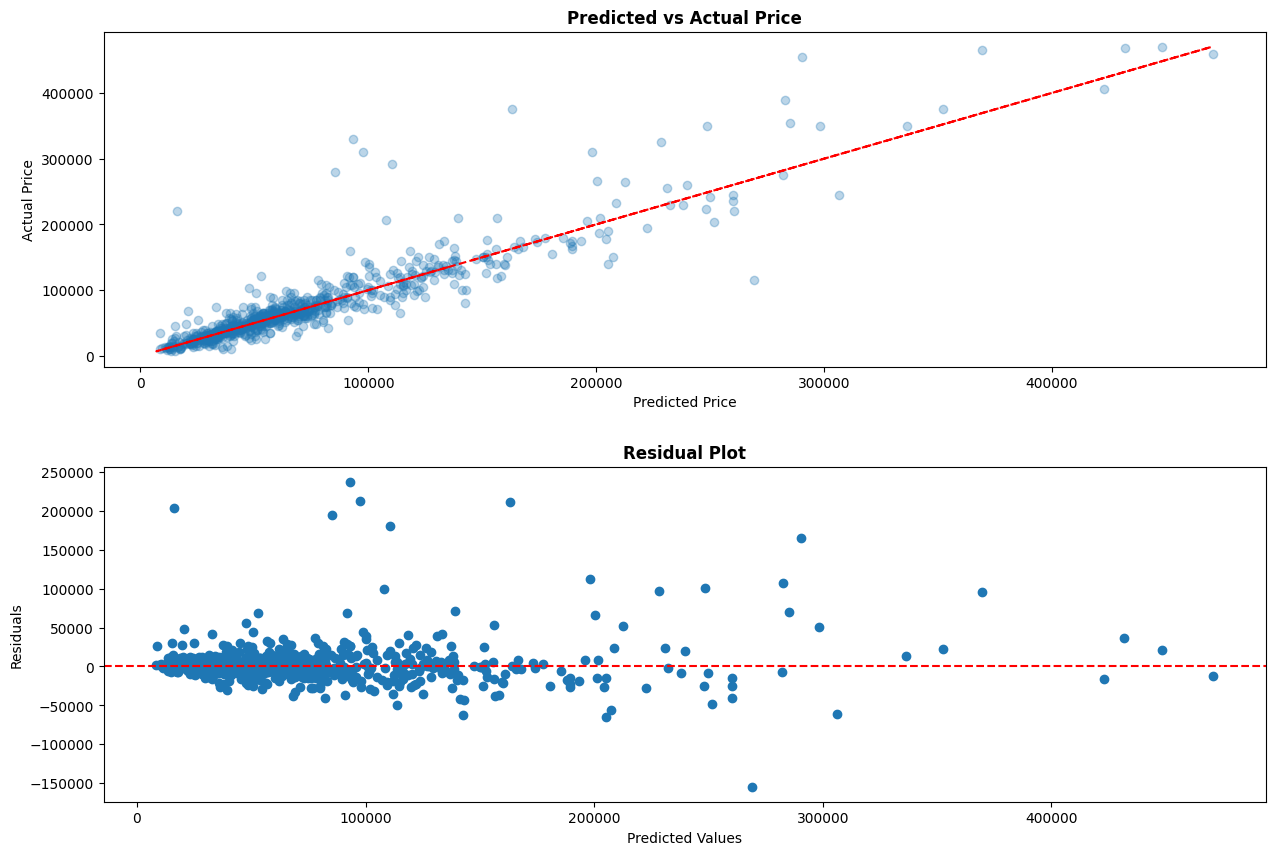

In [90]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))

# Plot actual vs predicted price
ax1.scatter(df_log_xgb['pred'], df_log_xgb['act'], alpha=0.3)
ax1.plot(df_log_xgb['act'], df_log_xgb['act'], color='r', alpha=1, linestyle='--')
ax1.set_title('Predicted vs Actual Price', fontweight='bold')
ax1.set_xlabel('Predicted Price')
ax1.set_ylabel('Actual Price')

# Plot residual plot
ax2.scatter(df_log_xgb['pred'], df_log_xgb['diff'])
ax2.axhline(y=0, color='r', linestyle='--')
ax2.set_xlabel('Predicted Values')
ax2.set_ylabel('Residuals')
ax2.set_title('Residual Plot', fontweight='bold')

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.3)

# Display the plot
plt.show()

In [91]:
range_list = [{'price_range': '< 10000', 'bottom_limit': 0, 'upper_limit': 10000}, {'price_range': '> 450000', 'bottom_limit': 450000, 'upper_limit': float('inf')}]

# set range for price 10000 until 150000
for x in range(10000,160000,10000):
    if x == 10000:
        continue
    
    bot = x-10000

    range_list.append({
        'price_range' : f'{bot} - {x}',
        'bottom_limit' : bot,
        'upper_limit' : x
    })

# set range for price 150000 until 450000
for x in range(150000,500000,50000):
    if x == 150000:
        continue
    
    bot = x-50000

    range_list.append({
        'price_range' : f'{bot} - {x}',
        'bottom_limit' : bot,
        'upper_limit' : x
    })

def sortLim(e):
  return e['upper_limit']

range_list.sort(key=sortLim)

In [92]:
check = []
list_mae = []
list_mape = []

for val in range_list:
    range_df = df_log_xgb[(df_log_xgb['act'] > val['bottom_limit']) & (df_log_xgb['act'] <= val['upper_limit'])]
    
    mae = mean_absolute_error(range_df['act'], range_df['pred'])
    mape = mean_absolute_percentage_error(range_df['act'], range_df['pred'])

    check.append(len(range_df))
    list_mae.append(mae)
    list_mape.append(mape)

pr_df = pd.DataFrame({
    "price_range": [r['price_range'] for r in range_list],
    "number_of_data": check,
    "MAE": list_mae,
    "MAPE": list_mape
})

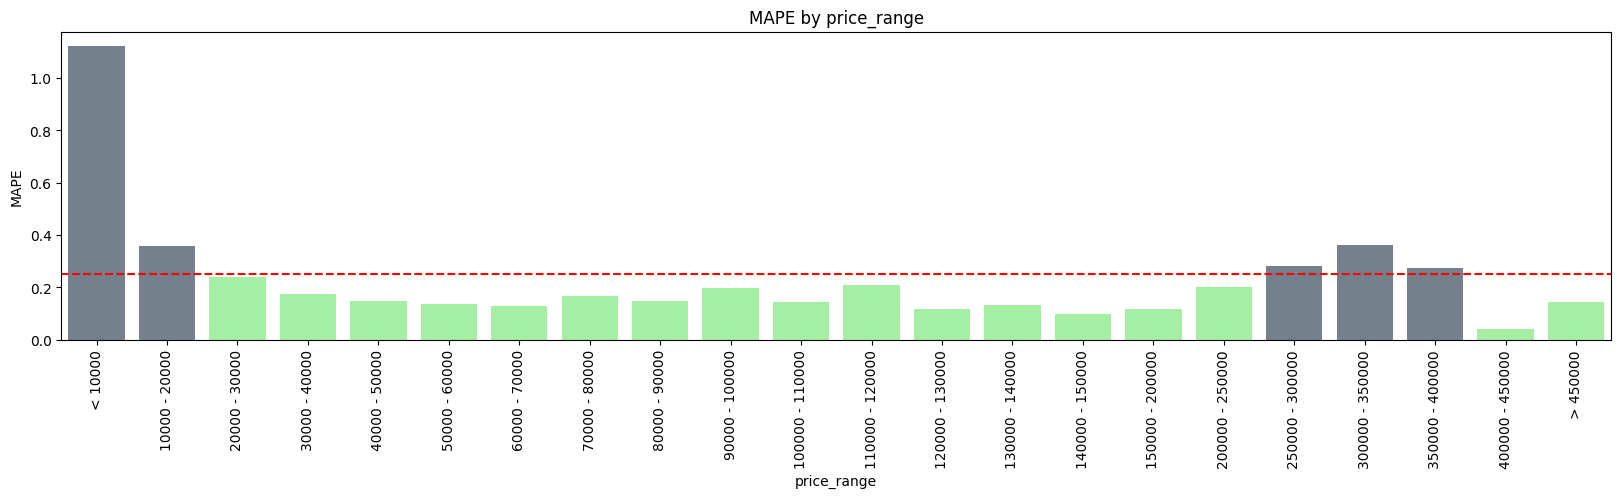

In [93]:
plt.figure(figsize=(20,4))

cols = ['palegreen' if x < 0.25 else '#708090' for x in pr_df['MAPE']]

sns.barplot(pr_df, x='price_range', y='MAPE', palette=cols).set(title='MAPE by price_range')

plt.axhline(y=0.25, color='red', ls='--')

plt.xticks(rotation = 90);

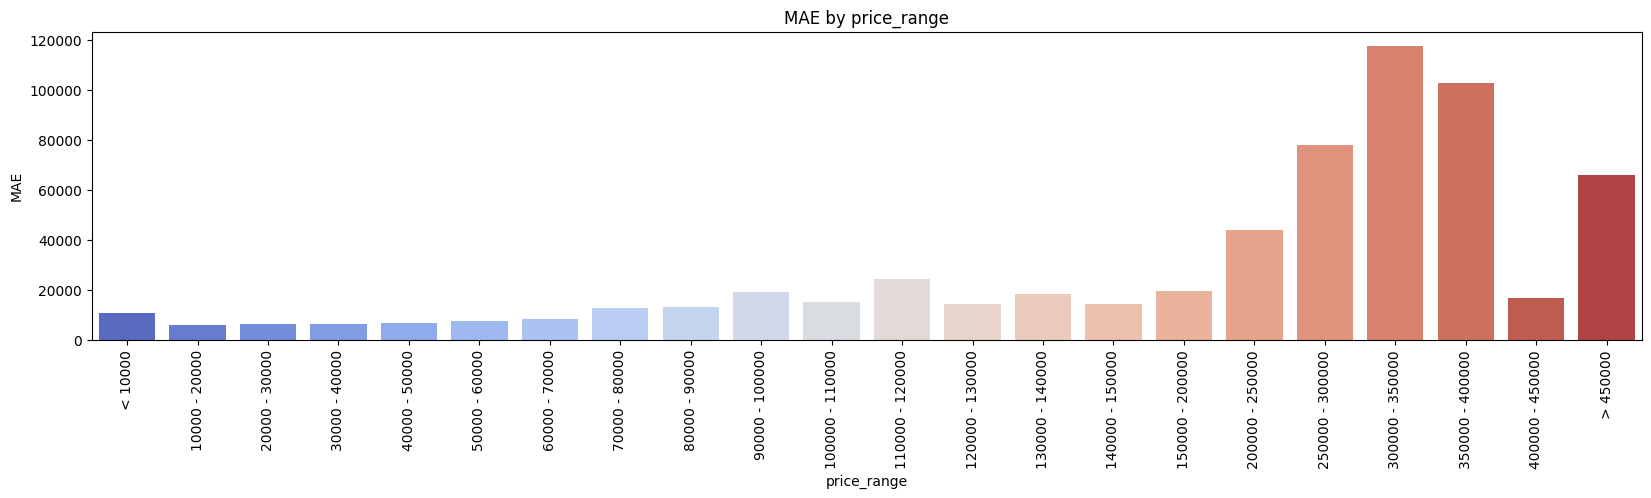

In [94]:
plt.figure(figsize=(20,4))

sns.barplot(pr_df, x='price_range', y='MAE', palette='coolwarm').set(title='MAE by price_range')

plt.xticks(rotation = 90);

### **Interpretation & Explanation**

#### **Feature Importances**

In [95]:
import shap

# based on which importance is checked
X_importance =  pd.DataFrame(ct.transform(test[feature]), columns=ct.get_feature_names_out())

# Explain model predictions using shap library
X_train_encode = pd.DataFrame(ct.transform(train[feature]), columns=ct.get_feature_names_out())

explainer = shap.TreeExplainer(xgb.fit(X_train_encode, np.log(train[target])))
shap_values = explainer.shap_values(X_importance)

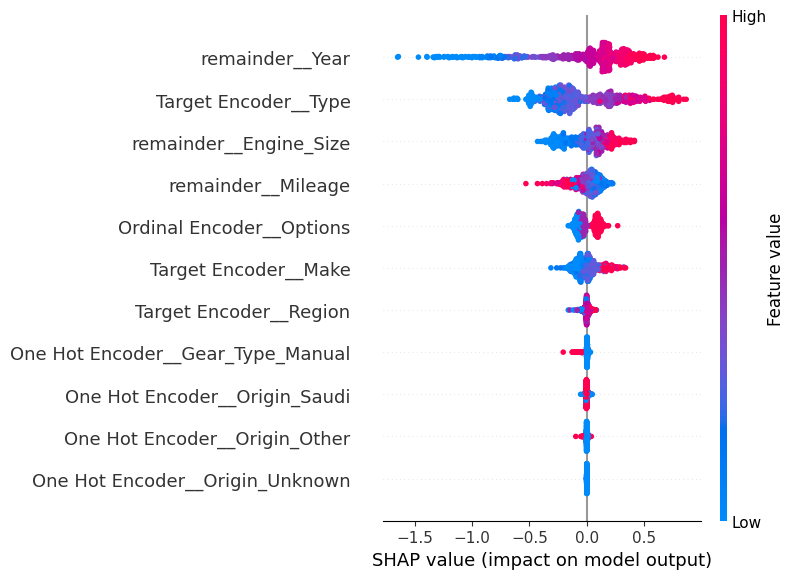

In [96]:
# Plot summary_plot
shap.summary_plot(shap_values, X_importance)

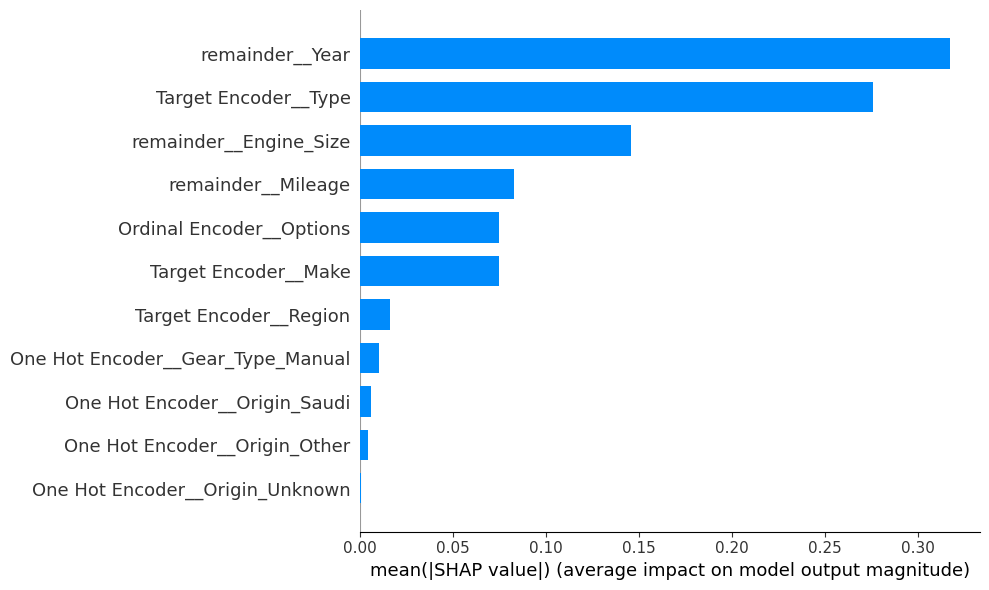

In [97]:
# Plot summary_plot as barplot

shap.summary_plot(shap_values, X_importance, plot_type='bar', plot_size=[10,6])

# `Conclusion`

# `Recommendation`

# `Save Model`

In [98]:
# Save Model

import pickle

estimator = Pipeline([
        ('preprocessing', ct),
        ('model', log_xgb)
        ])

estimator.fit(train[feature], train[target])

pickle.dump(estimator, open('AAH-used-car-price-predictor-model.sav', 'wb'))